In [1]:
import pandas as pd
from geopy.distance import geodesic


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Distance.csv')

In [6]:
# Read the CSV file into a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Source         870 non-null    object
 1   Destination    924 non-null    object
 2   Address        923 non-null    object
 3   City           924 non-null    object
 4   State          924 non-null    object
 5   Lat long of A  924 non-null    object
 6   Lat long of B  870 non-null    object
dtypes: object(7)
memory usage: 50.7+ KB


In [14]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Distance.csv')
# Define a function to calculate distance between two points
def calculate_distance(row):
    #source_coords = (row['Source Lat'], row['Source Long'])
    #dest_coords = (row['Dest Lat'], row['Dest Long'])
        source_coords = (row['Source Lat','Source Long'])
    dest_coords = (row['Dest Lat','Dest Long'])
    
    return geodesic(source_coords, dest_coords).kilometers

# Apply the function to each row and store the result in a new column 'Distance'
df['Distance (km)'] = df.apply(calculate_distance, axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_file.csv', index=False)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [17]:
df = pd.read_csv('Distance.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Source         870 non-null    object 
 1   Destination    924 non-null    object 
 2   Address        923 non-null    object 
 3   City           924 non-null    object 
 4   State          924 non-null    object 
 5   Lat long of A  924 non-null    object 
 6   Lat long of B  870 non-null    object 
 7   Source Lat     924 non-null    object 
 8   Source Long    918 non-null    float64
 9   Dest Lat       870 non-null    float64
 10  Dest Long      870 non-null    float64
dtypes: float64(3), object(8)
memory usage: 79.5+ KB


In [31]:
import pandas as pd
from geopy.distance import geodesic

# Read the CSV file into a DataFrame
df = pd.read_csv('Distance.csv')

# Define a function to calculate distance between two points
def calculate_distance(row):
    source_coords = (row['Source Lat'], row['Source Long'])
    dest_coords = (row['Dest Lat'], row['Dest Long'])
    return geodesic(source_coords, dest_coords).kilometers

# Apply the function to each row and store the result in a new column 'Distance'
df['Distance (km)'] = df.apply(calculate_distance, axis=1).round(2)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_distance_file1.csv', index=False)

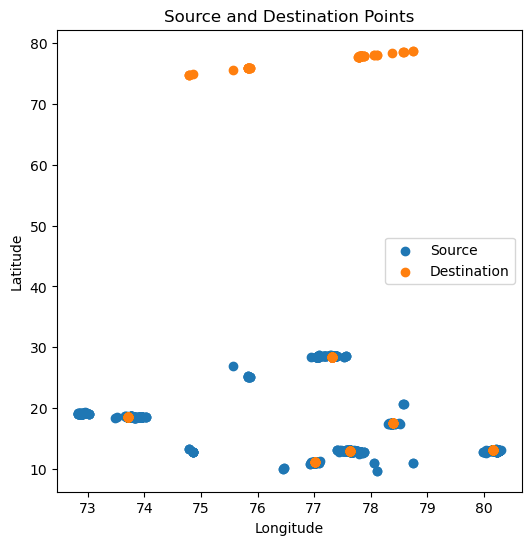

In [33]:
import pandas as pd
from geopy.distance import geodesic

# Load the dataset
df = pd.read_csv('Distance.csv')

# Function to calculate distance using Haversine formula
def calculate_distance(row):
    source_coords = (row['Source Lat'], row['Source Long'])
    dest_coords = (row['Dest Lat'], row['Dest Long'])
    distance = geodesic(source_coords, dest_coords).kilometers
    return round(distance, 2)  # Round distance to 2 decimal places

# Calculate distances and add them to the DataFrame
df['Distance (km)'] = df.apply(calculate_distance, axis=1)

# Data Visualization
import matplotlib.pyplot as plt

# Scatter plot of source and destination points
plt.figure(figsize=(6, 6))
plt.scatter(df['Source Long'], df['Source Lat'], label='Source')
plt.scatter(df['Dest Long'], df['Dest Lat'], label='Destination')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Source and Destination Points')
plt.legend()
plt.show()

# Routing and Path Optimization - Requires additional libraries and APIs
# Geographical Clustering - Utilize clustering algorithms like K-means
# Spatial Analysis - Analyze distribution and patterns in source and destination points
# Geospatial Data Joining - Join with other geospatial datasets for deeper analysis
# Geofencing and Proximity Analysis - Define geofences and analyze proximity of points
# Geocoding and Reverse Geocoding - Convert addresses to coordinates and vice versa
# Network Analysis - Analyze connectivity and relationships between points
# Spatial Visualization - Create interactive maps using libraries like folium or geopandas


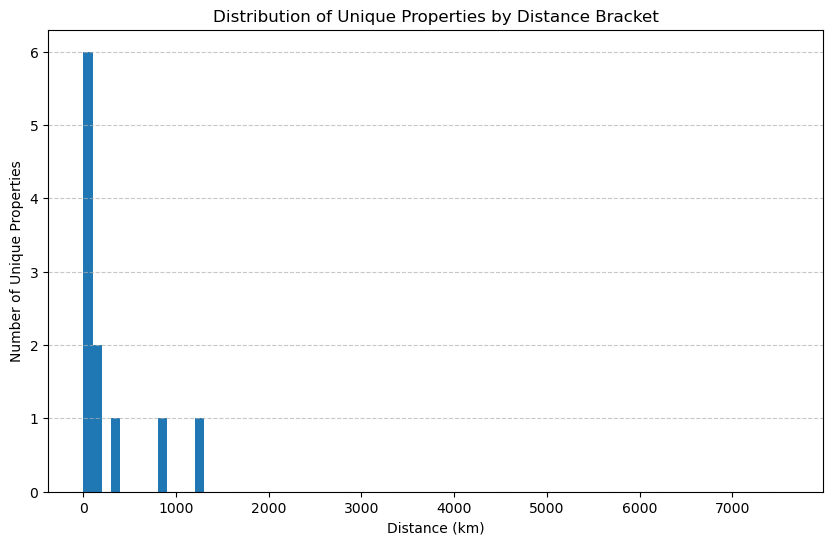

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Distance.csv')

# Function to calculate distance using Haversine formula
def calculate_distance(row):
    source_coords = (row['Source Lat'], row['Source Long'])
    dest_coords = (row['Dest Lat'], row['Dest Long'])
    distance = geodesic(source_coords, dest_coords).kilometers
    return round(distance, 2)  # Round distance to 2 decimal places

# Calculate distances and add them to the DataFrame
df['Distance (km)'] = df.apply(calculate_distance, axis=1)

# Calculate number of unique properties within each distance bracket
distance_brackets = range(0, int(df['Distance (km)'].max()) + 100, 100)
unique_properties_counts = []
for i in range(len(distance_brackets) - 1):
    mask = (df['Distance (km)'] >= distance_brackets[i]) & (df['Distance (km)'] < distance_brackets[i+1])
    unique_properties_count = df[mask]['Source'].nunique()
    unique_properties_counts.append(unique_properties_count)

# Plot the histogram
plt.figure(figsize=(10, 6))
    plt.bar(distance_brackets[:-1], unique_properties_counts, width=100, align='edge')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Unique Properties')
plt.title('Distribution of Unique Properties by Distance Bracket')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


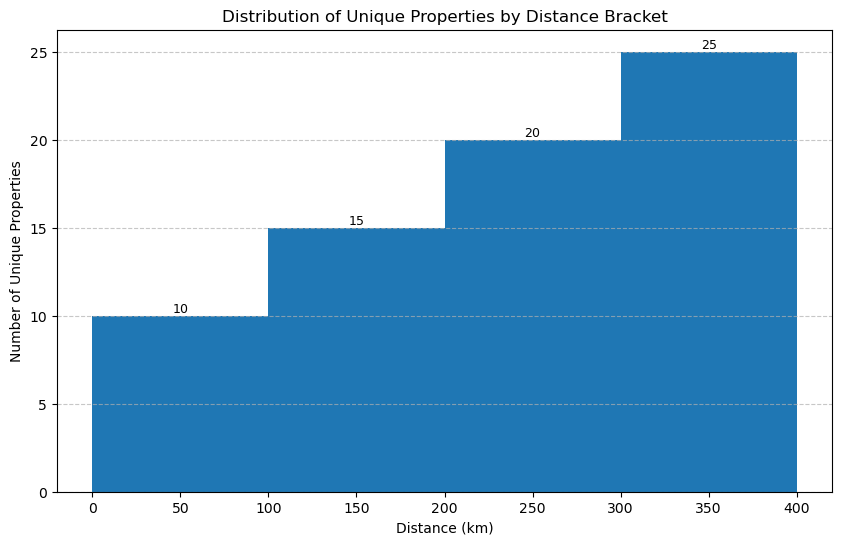

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
distance_brackets = [0, 100, 200, 300, 400]
unique_properties_counts = [10, 15, 20, 25]

# Plot the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(distance_brackets[:-1], unique_properties_counts, width=100, align='edge')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Unique Properties')
plt.title('Distribution of Unique Properties by Distance Bracket')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar, count in zip(bars, unique_properties_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=9)

plt.show()
